### Multiclass classification
    Binary classification is a sample(s) belong to either of the 2 classes(binary classes 0 or 1)
    
    In Multiclass classification, instead of 2 classes, we will have more than 2 classes i.e a small discrete number of categories like (0, 1, 2.. , 9 => 10 classes or more but just small an discrete instead of all the numbers in between like regression).
    
    Each sample may belong any "one" of these discrete classes unlike multilabel classification where a sample may belong to more than one class.
    
    Neural Networks are often used to classify data. Examples are neural networks:

            take in photos and classify subjects in the photos as {dog, cat, horse, other}
            take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}
            
    A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category.
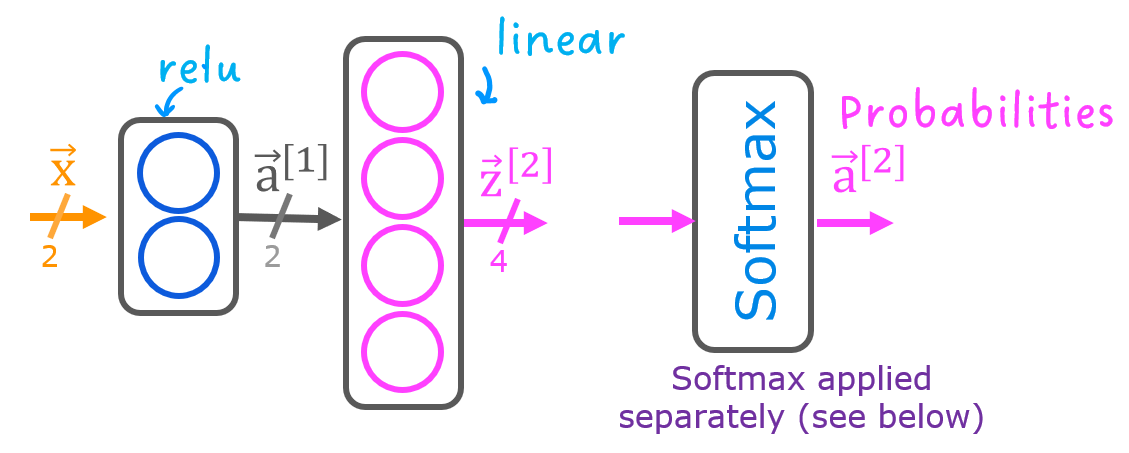

    In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

    Let's start by creating a four-class data set.
    
    This lab will use a 2-layer network as shown. Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.
    
    Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a linear rather than a softmax activation. While it is possible to include the softmax in the output layer, it is more numerically stable(to avoid numerical round off errors) if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.
    
    Setting from_logits=True as an argument to the loss function of model.compile() specifies that the output activation was linear rather than a softmax and also to apply softmax function directly in the loss function when the loss is calculating

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax, linear, relu
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

np.set_printoptions(precision=2)
tf.autograph.set_verbosity(0)

In [11]:
# np.__version__ #1.23.4
import sys
sys.version_info #3.8.10

sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)

In [38]:
#make data
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=1.0, random_state=30)
print(X.shape)
print(y.shape)
print(np.unique(y))

(100, 2)
(100,)
[0 1 2 3]


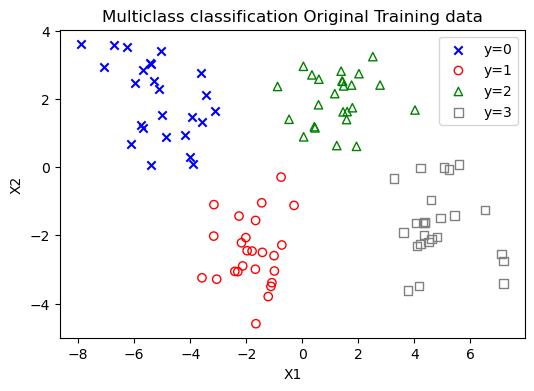

In [79]:
def plot_data(X, y):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    classes = np.unique(y)
    c0 = y==classes[0]
    c1 = y==classes[1]
    c2 = y==classes[2]
    c3 = y==classes[3]
    ax.scatter(X[c0, 0], X[c0, 1], label="y=0", c="blue", marker="x")
    ax.scatter(X[c1, 0], X[c1, 1], label="y=1", marker="o", facecolors="None", edgecolors="red")
    ax.scatter(X[c2, 0], X[c2, 1], label="y=2", marker="^", facecolors="None", edgecolors="green")
    ax.scatter(X[c3, 0], X[c3, 1], label="y=3", marker="s", facecolors="None", edgecolors="gray")
    ax.set_xlabel("X1"); ax.set_ylabel("X2")
    ax.legend(loc="best")
    ax.set_title("Multiclass classification Original Training data")
    plt.show()
    
plot_data(X, y)

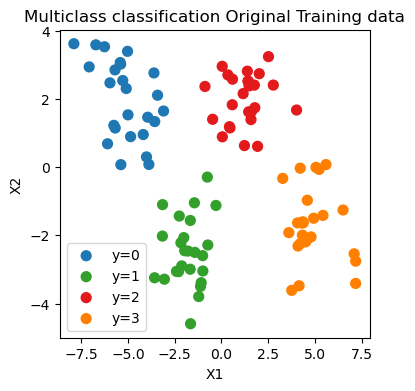

In [90]:
#best way of creating the above plot
# function below uses a loop to plot each class separately by grouping the data points belonging to each class based on their class labels (y).
#It then uses the scatter function from Matplotlib to create the scatter plot for each class.
#The data points are plotted with the specified color (based on the class index), which are controlled by the c parameter of the scatter function.
#The colormap is used to map the class indices to distinct colors. see more in the next cell

import matplotlib.pyplot as plt
import matplotlib as mpl

#creating the colormap of odd indices to map the colors to different classes
dkcolors = plt.cm.Paired((1, 3, 5, 7)) #get the dark 4 colors
dkcolors_map = mpl.colors.ListedColormap(dkcolors)

def plot_data(X, y, equal_xy=False):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    classes = len(np.unique(y))
    for i in range(classes):
        c_i_idx = np.where(y==i) #gives row idxes of where y==class (array([0, 4, 5..,], dtype=int))
        c = len(c_i_idx[0]) * [i] #creates an array with values of i of specified length which is being multiplies [0, 0, 0 ...]
        ax.scatter(X[c_i_idx, 0], X[c_i_idx, 1], label=f"y={i}", marker="o", s=50,
                   c=c, cmap=dkcolors_map, vmin=0.0, vmax=dkcolors_map.N)
        #ax.scatter(X[idx, 0], X[idx, 1],  marker=m, color=map(col),
         #          vmin=0, vmax=map.N, s=size, label=label)

    ax.set_xlabel("X1"); ax.set_ylabel("X2")
    ax.legend(loc="best")
    if equal_xy: ax.axis("equal") #if equal_xy is True, setting ylim on the plot may not work
    ax.set_title("Multiclass classification Original Training data")
    plt.show()
    
plot_data(X, y)

### plt.cm.Paired to color map the points
       plt.cm.Paired is a colormap (color map) available in Matplotlib, specifically in the matplotlib.cm module. Colormaps in Matplotlib are used to map scalar data to colors in visualizations, making it easier to represent data with different intensities or values.

    The plt.cm.Paired colormap consists of 12 different colors, designed for paired data where each pair of data points corresponds to a unique color. It is commonly used for visualizations where distinct colors are needed to differentiate between related data points or groups.

    Here's an example of how to use plt.cm.Paired to visualize paired data in a scatter plot:
    
    In this example, we create two clusters of points (Cluster 1 and Cluster 2) and plot them as a scatter plot using the plt.scatter() function. The color parameter is set to plt.cm.Paired(0) for Cluster 1 and plt.cm.Paired(1) for Cluster 2, which assigns unique colors from the Paired colormap to each cluster. The colormap provides visually distinct colors for the paired data points.

    You can adjust the plt.cm.Paired colormap to suit your specific visualization needs. Keep in mind that it is designed for data with two categories or pairs, so it may not be suitable for visualizing data with more than two categories. In such cases, you can explore other colormaps available in Matplotlib or create custom colormaps.

12
((0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.2, 0.6274509803921569, 0.17254901960784313), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))
12
[[0.12 0.47 0.71 1.  ]
 [0.2  0.63 0.17 1.  ]
 [1.   0.5  0.   1.  ]
 [0.42 0.24 0.6  1.  ]
 [0.89 0.1  0.11 1.  ]
 [0.69 0.35 0.16 1.  ]]
[[0.12 0.47 0.71 1.  ]
 [0.2  0.63 0.17 1.  ]
 [1.   0.5  0.   1.  ]
 [0.42 0.24 0.6  1.  ]
 [0.89 0.1  0.11 1.  ]
 [0.69 0.35 0.16 1.  ]]


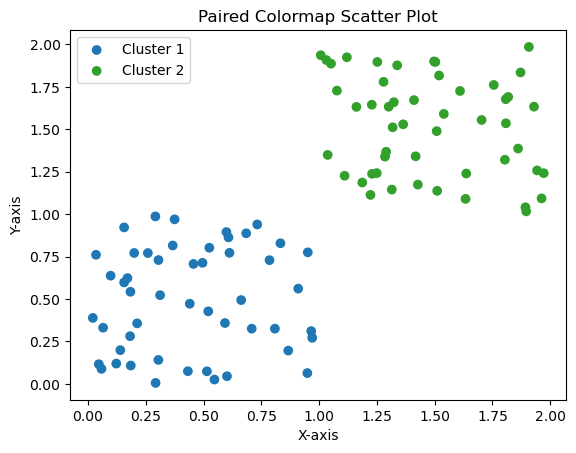

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data with two clusters of points
np.random.seed(42)
x1 = np.random.rand(50)
y1 = np.random.rand(50)
x2 = np.random.rand(50) + 1
y2 = np.random.rand(50) + 1

# Create a scatter plot with the Paired colormap
# plt.scatter(x1, y1, color=plt.cm.Paired(0), label='Cluster 1')
# plt.scatter(x2, y2, color=plt.cm.Paired(1), label='Cluster 2')
print(plt.cm.Paired)
print(plt.cm.Paired.N)
print(plt.cm.Paired.colors) #rgb tuples
print(len(plt.cm.Paired.colors))

dkcolors = plt.cm.Paired((1, 3, 7, 9, 5, 11)) #getting odd tuples
print(dkcolors)
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
print(dkcolors_map)
print(dkcolors_map.colors)

ltcolors = plt.cm.Paired((0, 2, 6, 8, 4, 10))
ltcolors_map = mpl.colors.ListedColormap(ltcolors)

plt.scatter(x1, y1, c=[0]*50, label='Cluster 1', cmap=dkcolors_map, vmin=0, vmax=dkcolors_map.N,)
#For a sequence of values to be color-mapped, use the 'c' argument instead
#now c = [0 0 0 ... 0] => 50 zero's => 0 for each sample (X, y) of 50 samples, This is 0 is mapped to our dkcolor_map index, 
#so we get the color that is there in the index 0 of our dkcolors_map to all the points
#make sure to use vmin and vmax to get the colors mapped
plt.scatter(x2, y2, c=[1]*50, cmap=dkcolors_map, label='Cluster 2', vmin=0, vmax=dkcolors_map.N,)
# Add legend and labels
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Paired Colormap Scatter Plot')

# Show the plot
plt.show()

In [162]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential([
    Dense(2, activation="relu", name="L1"),
    Dense(4, activation="linear", name="L2") #outputs logits of size 4 for each example
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X, y, epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 2.5546
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 2.3083
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 2.0836
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.9033
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.7519
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.6048
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.4983
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4015
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3269
Epoch 10/200
4/4 [==============================] - 0s 0s/step - loss: 1.2536
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2007
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1549
Epoch 13/200
4/4 [==============================] - 0s 0s/step

Epoch 105/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 106/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0874
Epoch 107/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0848
Epoch 109/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 110/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0818
Epoch 111/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0803
Epoch 112/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 113/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0774
Epoch 114/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0760
Epoch 115/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 116/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 117/200
4/4 [=====================

In [94]:
#Model output predictions as logits cuz of linear output layer
y_pred_logits = model.predict(X, verbose=0)
print(f"y_pred_logits : \n{y_pred_logits[:2]}")

#Logits predictions to softmax probabilites - 4 probs i.e each to corresponding to a class for each sample
y_pred_probs = tf.nn.softmax(y_pred_logits) 
print(f"y_pred_probs : \n{y_pred_probs[:2]}")

#Finding the category using np.argmax
y_preds = np.zeros_like(y)
for i in range(X.shape[0]):
    y_preds[i] = np.argmax(y_pred_logits[i])
print(f"y_preds : \n{y_preds[:2]}")   


y_pred_logits : 
[[-37.48  -6.65  -3.7    1.32]
 [-38.4   -6.82  -3.85   1.43]]
y_pred_probs : 
[[1.40e-17 3.43e-04 6.56e-03 9.93e-01]
 [5.04e-18 2.59e-04 5.05e-03 9.95e-01]]
y_preds : 
[3 3]


    With the model trained, we can see how the model has classified the training data.

184/184 [==============================] - 0s 785us/step
(5858,)


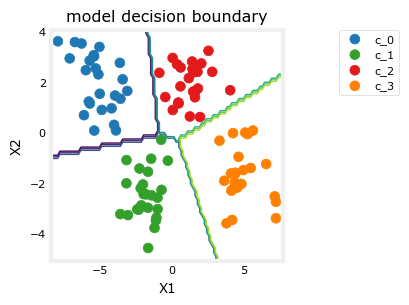

In [163]:
#Plot a multi-class categorical decision boundary
# This version handles a non-vector prediction (adds a for-loop over points)
import matplotlib.pyplot as plt
import matplotlib as mpl

dkcolors = plt.cm.Paired((1, 3, 5, 7))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)

def plot_data(X, y, ax, classes, equal_xy=False):
    for i in range(classes):
        c_i_idx = np.where(y==i) #gives row idxes of where y==class (array([0, 4, 5..,], dtype=int))
        c = len(c_i_idx[0]) * [i] #creates an array with values of i of specified length which is being multiplies [0, 0, 0 ...]
        ax.scatter(X[c_i_idx, 0], X[c_i_idx, 1], label=f"c_{i}", marker="o", s=50,
                   c=c, cmap=dkcolors_map, vmin=0.0, vmax=dkcolors_map.N)

    ax.set_xlabel("X1"); ax.set_ylabel("X2")
    ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1), borderaxespad=0.) #bbox_to_anchor - allows to place legend outside of the axes relative to axes
    if equal_xy: ax.axis("equal") #if equal_xy is True, setting ylim on the plot may not work
    
def plot_decision_boundary(X, y, model_predict, vector=False):
    #create the xx and yy spaces
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = max(x_max - x_min, y_max - y_min) / 100
    
    #creating the mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #(58, 101)
    points = np.c_[xx.ravel(), yy.ravel()] #(58 * 101 = 5858 , 2)
    
    #make predictions for each point in mesh
    if vector:
        z = model_predict(points)
        print(z.shape)
    else:
        z = np.zeros((points.shape[0],))
        print(z.shape)
        for i in range(len(points)):
            z[i] = model_predict(points[i].reshape(1, 2))
    z = z.reshape(xx.shape)
    
    #contour plot highlights boundaries between values - classes in this case
    plt.contour(xx, yy, z, linewidths=1) #contourf gives the shaded contour plot, countour gives the boundaries
    
def plot_classification(X, y, model, vector=False):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    classes = len(np.unique(y))
    #plot the original data to the decison boundary
    plot_data(X, y, ax, classes)
    model_predict = lambda x : np.argmax(model.predict(x), axis=1)
    #plot the decison boundary
    plot_decision_boundary(X, ax, model_predict, vector=True)
    ax.set_title("model decision boundary")
    plt.show()
    
plot_classification(X, y, model, vector=True)

    Above, the decision boundaries show how the model has partitioned the input space. This very simple model has had no trouble classifying the training data. How did it accomplish this? Let's look at the network in more detail.

    Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed explanation of the results. It may be helpful to gain more intuition about how the layers combine to solve a classification problem.

W - layer1 
 [[ 1.1  -0.21]
 [ 0.62  1.84]]
b - layer1 
 [1.55 1.25]
0
1


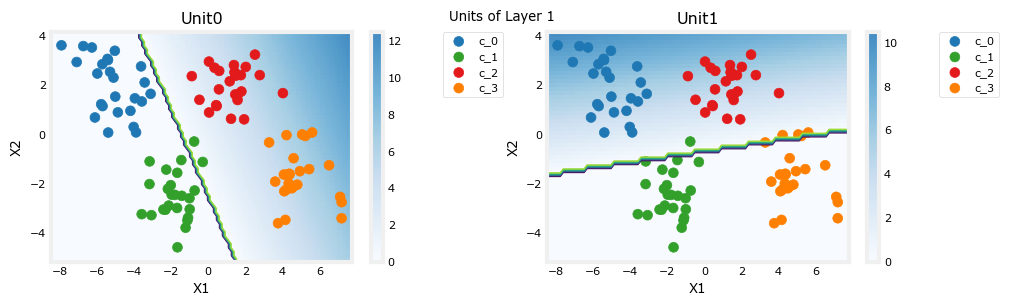

In [170]:
from matplotlib import cm
from matplotlib import colors as colors
import warnings

def plot_data(X, y, ax, classes, equal_xy=False):
    for i in range(classes):
        c_i_idx = np.where(y==i) #gives row idxes of where y==class (array([0, 4, 5..,], dtype=int))
        c = len(c_i_idx[0]) * [i] #creates an array with values of i of specified length which is being multiplies [0, 0, 0 ...]
        ax.scatter(X[c_i_idx, 0], X[c_i_idx, 1], label=f"c_{i}", marker="o", s=50,
                   c=c, cmap=dkcolors_map, vmin=0.0, vmax=dkcolors_map.N)

    ax.set_xlabel("X1"); ax.set_ylabel("X2")
    ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1), borderaxespad=0.) #bbox_to_anchor - allows to place legend outside of the axes relative to axes
    if equal_xy: ax.axis("equal") #if equal_xy is True, setting ylim on the plot may not work
        
def truncate_colormap(cmap, minval=0.0, maxval=0.1, n=100):
        new_cmap = colors.LinearSegmentedColormap.from_list(
            "trunc({n}, {a:.2f}, {b:.2f})".format(n=cmap.name, a=minval, b=maxval),
            cmap(np.linspace(minval, maxval, n))
        )
        return new_cmap

def plt_relu_unit(X, y, W, b):
    classes = len(np.unique(y))
    units = W.shape[1]
    fig, ax = plt.subplots(1, units, figsize=(10, 3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    
    for i in range(units):
        print(i)
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        h = max(x_max - x_min, y_max - y_min) / 100
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        points = np.c_[xx.ravel(), yy.ravel()]
        act = np.zeros(len(points))
        c = np.zeros(len(points))
        for j in range(len(points)):
            #function of each unit
            z = np.dot(points[j], W[:, i]) + b[i]
            relu_out = np.maximum(0, z)
            act[j] = relu_out
            c[j] = 0. if relu_out == 0 else 1.
        act = act.reshape(xx.shape)
        c = c.reshape(xx.shape)
        cmap = plt.get_cmap("Blues")
        new_cmap = truncate_colormap(cmap, minval=0.0, maxval=0.7)
        pcm = ax[i].pcolormesh(xx, yy, act, cmap=new_cmap,
                               alpha=0.9,  shading="nearest",
                               norm=cm.colors.Normalize(vmin=np.amin(act), vmax=np.amax(act)))
        ax[i].figure.colorbar(pcm, ax=ax[i])
        plot_data(X, y, ax[i], classes) #plot original data
        with warnings.catch_warnings():  # suppress no contour warning
            warnings.simplefilter("ignore")
            ax[i].contour(xx, yy, c, linewidths=1) #just creates the bondary where c chnaged from 0 to 1
        ax[i].set_title(f"Unit{i}")
    
    fig.tight_layout(pad=0.7)
    fig.suptitle("Units of Layer 1")
    plt.show()

layer_1 = model.get_layer("L1")
W1, b1 = layer_1.get_weights()
print(f"W - layer1 \n {W1}")
print(f"b - layer1 \n {b1}")
#W - layer1 
#  [[ 1.1  -0.21]
#  [ 0.62  1.84]]
# b - layer1 
#  [1.55 1.25]
plt_relu_unit(X, y.reshape(-1,), W1, b1)

    These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are (x1, x2) on the axis. The output of the unit is represented by the color of the background. Basically the colors tells us when the activation is activated(>0) and disabled(=0). When a=0, the color is whitish blue, where as when a>0, the color is bluish. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 12 at their peaks. The contour lines in this graph show the transition point between the output a, being zero and non-zero. Recall the graph for a ReLu : The contour line in the graph is the inflection point in the ReLu.

    Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.
    
    Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a value greater than zero, while points below will output zero. Let's see how this works out in the next layer!

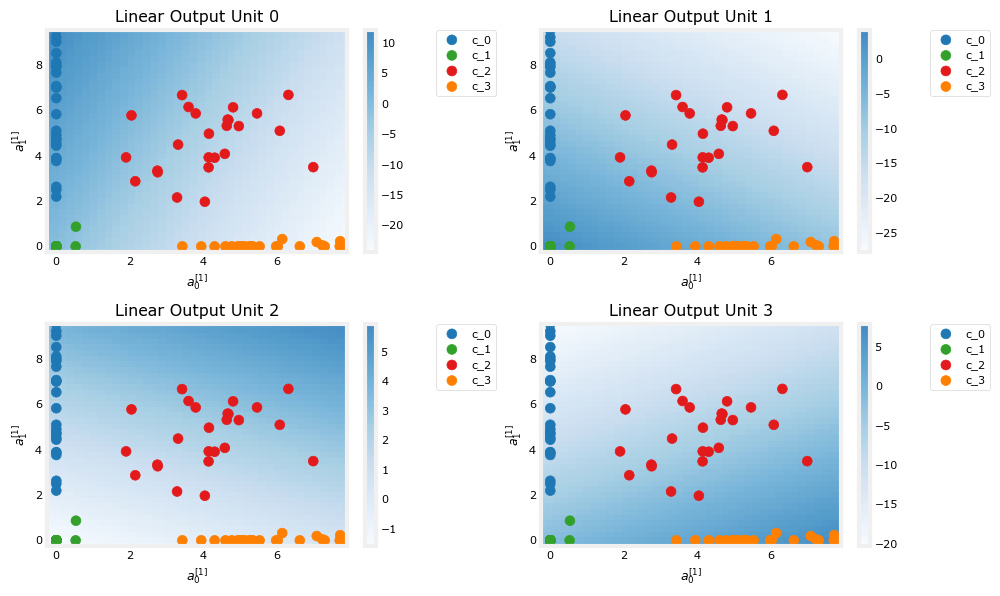

In [182]:
#Crreating the i/p features for the output after L1 transformation layer which is the o/p of first layer
X_L2 = np.maximum(0, np.dot(X, W1) + b1)

# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

def plot_data(X, y, ax, classes, equal_xy=False):
    for i in range(classes):
        c_i_idx = np.where(y==i) #gives row idxes of where y==class (array([0, 4, 5..,], dtype=int))
        c = len(c_i_idx[0]) * [i] #creates an array with values of i of specified length which is being multiplies [0, 0, 0 ...]
        ax.scatter(X[c_i_idx, 0], X[c_i_idx, 1], label=f"c_{i}", marker="o", s=50,
                   c=c, cmap=dkcolors_map, vmin=0.0, vmax=dkcolors_map.N)

    ax.set_xlabel("X1"); ax.set_ylabel("X2")
    ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1), borderaxespad=0.) #bbox_to_anchor - allows to place legend outside of the axes relative to axes
    if equal_xy: ax.axis("equal") #if equal_xy is True, setting ylim on the plot may not work

def truncate_colormap(cmap, minval=0.0, maxval=0.1, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n}, {a:.2f}, {b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap
    
def plt_probs(x1_rng, x2_rng, layer_f, ax):
    #generating xspace and yspace
    x_space = np.linspace(x1_rng[0], x1_rng[1], 40)
    y_space = np.linspace(x2_rng[0], x2_rng[1], 40)
    
    xx, yy = np.meshgrid(x_space, y_space)
    act = np.zeros((len(xx), len(yy)))
    for i in range(len(xx)):
        for j in range(len(yy)):
            tmp_x = np.array([[xx[i, j], yy[i, j]]])
            act[i, j] = layer_f(tmp_x)
    cmap = plt.get_cmap("Blues")
    new_cmap = truncate_colormap(cmap, minval=0.0, maxval=0.7)
    pcm = ax.pcolormesh(xx, yy, act, cmap=new_cmap,
                               alpha=0.9,  shading="nearest",
                               norm=cm.colors.Normalize(vmin=np.amin(act), vmax=np.amax(act)))
    ax.figure.colorbar(pcm, ax=ax)

def plt_output_layer_linear(X_L2, y, W2, b2, classes, x1_rng = (-8, 8), x2_rng = (-5, 4)):
    units = W2.shape[1] #4units
    fig, ax = plt.subplots(2, int(units / 2), figsize=(10, 6))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    
    for i, axi in enumerate(ax.flat):
        layer_f = lambda x: np.dot(x , W2[:, i]) + b2[i]
        plt_probs(x1_rng, x2_rng, layer_f, axi)
        plot_data(X_L2, y, axi, classes)
        
        axi.set_xlabel(r"$a^{[1]}_0$",size=9)
        axi.set_ylabel(r"$a^{[1]}_1$",size=9)
        axi.set_xlim(x1_rng)
        axi.set_ylim(x2_rng)
        axi.set_title(f"Linear Output Unit {i}")
    fig.tight_layout()

classes = len(np.unique(y))
plt_output_layer_linear(X_L2, y.reshape(-1,), W2, b2, classes,
                        x1_rng = (-0.25, np.amax(X_L2[:, 0])),
                        x2_rng = (-0.25, np.amax(X_L2[:, 1])))

    The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer a0_[1] and a1_[1].
    
    As predicted above, classes 0 and 1 (blue and green) have a0_[1] = 0 while classes 1 and 3 (green and orange) have a1_[1] = 0.

    Once again, the intensity of the background color indicates the highest values. I
    Unit 0 will produce its maximum value in the upper left corner selecting class 1 (blue)
    Unit 1 produces its highest values near (0,0), where class 1 (green) has been mapped
    Unit 2 produces its highest values in the upper right selecting our third class 2 (red)
    Unit 3 targets the lower right corner where final class 3 (orange) resides.

    One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done by the implied softmax function that is part of the loss function (SparseCategoricalCrossEntropy). Unlike other activation functions, the softmax works across all the outputs.

    You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition about what is happening under the hood.